This project is about using LIME to explain individual predictions in a Machine Learning application.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv("/content/winequality-red.csv")

In [5]:
df.shape
# rows,columns

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.head().T

,0,1,2,3,4
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000
citric acid,0.0000,0.0000,0.040,0.560,0.0000
residual sugar,1.9000,2.6000,2.300,1.900,1.9000
chlorides,0.0760,0.0980,0.092,0.075,0.0760
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100
sulphates,0.5600,0.6800,0.650,0.580,0.5600


In [9]:
# Checking misiing values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
X_feature_names=[i for i in df.columns if df[i].dtype in [np.float]]

<ipython-input-14-9ffec67418b7>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_feature_names=[i for i in df.columns if df[i].dtype in [np.float]]


In [15]:
X_feature_names

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [16]:
Y_feature_names=[i for i in df.columns if df[i].dtype in [np.int64]]

In [17]:
Y_feature_names

['quality']

In [18]:
# Create classification version of target variabble
df['goodquality']=[1 if x >= 7 else 0 for x in df['quality']]

In [19]:
df.head().T

,0,1,2,3,4
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000
citric acid,0.0000,0.0000,0.040,0.560,0.0000
residual sugar,1.9000,2.6000,2.300,1.900,1.9000
chlorides,0.0760,0.0980,0.092,0.075,0.0760
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100
sulphates,0.5600,0.6800,0.650,0.580,0.5600


In [20]:
X=df.drop(['quality','goodquality'],axis=1)
y=df['goodquality']

In [22]:
y.value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler
X_feature=X
X=StandardScaler().fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=0)

In [27]:
y_test.value_counts()

0    430
1     50
Name: goodquality, dtype: int64

In [28]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [30]:
model1=DecisionTreeClassifier(random_state=1)
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)

In [33]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       430
           1       0.49      0.68      0.57        50

    accuracy                           0.89       480
   macro avg       0.72      0.80      0.75       480
weighted avg       0.91      0.89      0.90       480



In [35]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)

In [36]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       430
           1       0.64      0.58      0.61        50

    accuracy                           0.92       480
   macro avg       0.80      0.77      0.78       480
weighted avg       0.92      0.92      0.92       480



In [37]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)

In [38]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       430
           1       0.47      0.48      0.48        50

    accuracy                           0.89       480
   macro avg       0.70      0.71      0.71       480
weighted avg       0.89      0.89      0.89       480



In [40]:
!pip install lime
import lime 
import lime.lime_tabular

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=190422fbf777878d82b96c2df861ac3f4fdbb00553597d6822902f34b97c656c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [41]:
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
                                                   feature_names=X_feature_names,
                                                   class_names=['goodquality'],
                                                   verbose=True,
                                                   mode='regression')

In [42]:
print(y_test)

1109    0
1032    0
1002    1
487     0
979     0
       ..
801     0
61      0
431     0
1210    0
713     0
Name: goodquality, Length: 480, dtype: int64


In [43]:
print(y_test[:3])

1109    0
1032    0
1002    1
Name: goodquality, dtype: int64


In [44]:
print(model1.predict(X_test[0:3]))

[0 0 1]


In [45]:
print(y_test[20:25])

1177    1
549     0
1341    0
1235    0
191     0
Name: goodquality, dtype: int64


In [47]:
print(model2.predict(X_test[20:25]))

[0 0 0 0 0]


In [48]:
exp = explainer.explain_instance(X_train[20],model2.predict)

Intercept -0.0058782818507905725
Prediction_local [0.07815575]
Right: 0


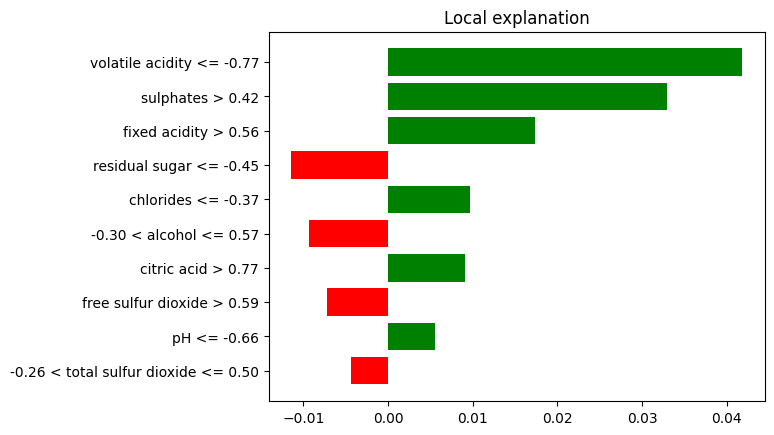

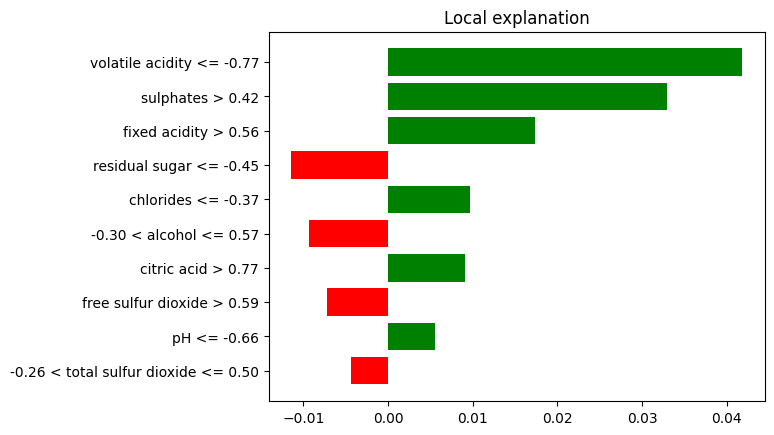

In [49]:
exp.as_pyplot_figure()

In [50]:
print(y_test[:3])

1109    0
1032    0
1002    1
Name: goodquality, dtype: int64


In [51]:
print(model3.predict(X_test[0:3]))

[0 0 1]
